In [1]:
cd /content/drive/MyDrive/DAUNAN

/content/drive/MyDrive/DAUNAN


In [2]:
ls

data/


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("data")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [11]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(21, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(21, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 21)        588       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 21)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 21)        3990      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 21)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4116)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               411700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [12]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [13]:
H = model1.fit(trainX, trainY, validation_data=(testX,testY), epochs=25,batch_size=30)

Epoch 1/25
15/15 [==============================] - 2s 110ms/step - loss: 1.6237 - accuracy: 0.2169 - val_loss: 1.5773 - val_accuracy: 0.3014
Epoch 2/25
15/15 [==============================] - 2s 102ms/step - loss: 1.5210 - accuracy: 0.3288 - val_loss: 1.4430 - val_accuracy: 0.4521
Epoch 3/25
15/15 [==============================] - 2s 103ms/step - loss: 1.3640 - accuracy: 0.4635 - val_loss: 1.2837 - val_accuracy: 0.5000
Epoch 4/25
15/15 [==============================] - 2s 102ms/step - loss: 1.1854 - accuracy: 0.5365 - val_loss: 1.1261 - val_accuracy: 0.5137
Epoch 5/25
15/15 [==============================] - 2s 103ms/step - loss: 1.0771 - accuracy: 0.5822 - val_loss: 1.0860 - val_accuracy: 0.5274
Epoch 6/25
15/15 [==============================] - 2s 105ms/step - loss: 0.9871 - accuracy: 0.6256 - val_loss: 1.0186 - val_accuracy: 0.5685
Epoch 7/25
15/15 [==============================] - 2s 102ms/step - loss: 0.8724 - accuracy: 0.6598 - val_loss: 0.9793 - val_accuracy: 0.6164
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


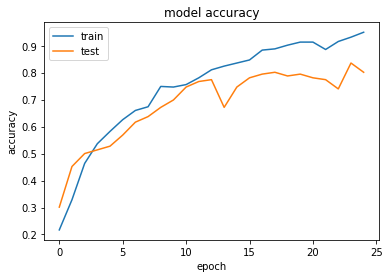

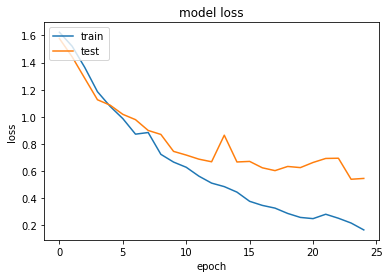

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.68      0.48      0.57        31
      GMB_02       0.67      0.94      0.78        33
      GMB_03       0.90      1.00      0.95        27
      GMB_04       0.78      0.74      0.76        19
      GMB_05       1.00      0.83      0.91        36

    accuracy                           0.80       146
   macro avg       0.81      0.80      0.79       146
weighted avg       0.81      0.80      0.80       146

